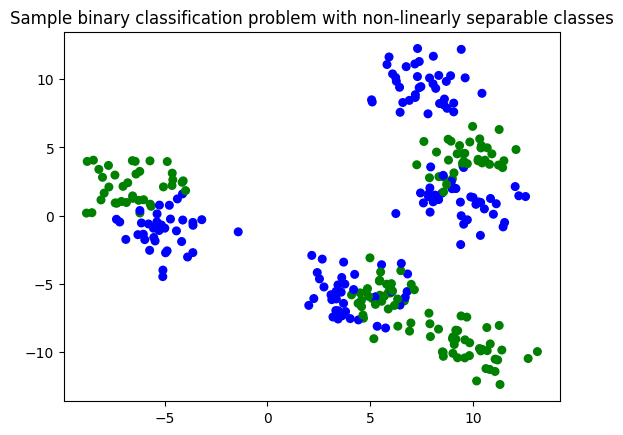

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [19]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
        scaler= MinMaxScaler()
        X_train_scaled= scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

In [20]:
from sklearn.neighbors import KNeighborsClassifier # sklear
k = 1
scr_best = 0
for i in range(1,len(X_train_scaled)):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaled, y_train)
    scr = knn.score(X_test_scaled, y_test)
    if scr_best < scr:
        scr_best = scr
        k = i

In [21]:
k_best = k # 'compute the best k'
score_best = scr_best #'compute the best score'
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 18 , score = 0.9466666666666667


In [22]:
def plot_decision_boundary(clf, X_train, y_train, X_test=None, y_test= None, title=None, precision=0.01,plot_symbol_size = 50):

    # Create color maps
    from matplotlib.colors import  ListedColormap
    import matplotlib as mpl

    colors_for_areas= [mpl.cm.viridis(.45),mpl.cm.viridis(.6)]
    colors_for_points = [mpl.cm.viridis(.3),mpl.cm.viridis(.75)]
    cmap_light = ListedColormap(colors_for_areas)
    cmap_bold  = ListedColormap(colors_for_points)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = precision #.01  # step size in the mesh

    X= np.concatenate([X_train,X_test], axis=0)
    x1_min, x1_max = X[:, 0].min() - .1, X[:, 0].max() + 0.1
    x2_min, x2_max = X[:, 1].min() - .1, X[:, 1].max() + 0.1
    # Creates grids of values
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, mesh_step_size),
                         np.arange(x2_min, x2_max, mesh_step_size))

    # numpy.c_  concatenation along the second axis
    # ravel() Returns a contiguous flattened array.
        # x = np.array([[1, 2, 3], [4, 5, 6]])
        # np.ravel(x) = [1 2 3 4 5 6]
    target_samples_grid= (np.c_[xx1.ravel(), xx2.ravel()])# 2-column ndarray # creates the all possible pairs
    # m= target_samples_grid.shape[0]
    # target_samples_grid_1= np.c_[np.ones(shape=(m,1)),target_samples_grid]
    print ('Call prediction for all grid values (precision of drawing = {}, you may configure to speed up e.g. precision=0.05)'.format(precision))
    Z = clf.predict(target_samples_grid)

    # Put the result into a color plot
    Z = Z.reshape(xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_train[:, 0], X_train[:, 1], s=plot_symbol_size, c=y_train.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='^', s=plot_symbol_size, c=y_test.ravel(), cmap=cmap_bold, edgecolor = 'black',alpha=0.75)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    import matplotlib.patches as mpatches
    patch0 = mpatches.Patch(color=colors_for_points[0], label='negative')
    patch1 = mpatches.Patch(color=colors_for_points[1], label='positive')
    plt.legend(handles=[patch0, patch1])
    plt.title(title)

    plt.xlabel('feature 1')
    plt.ylabel('feature 2')

    plt.show()

Call prediction for all grid values (precision of drawing = 0.01, you may configure to speed up e.g. precision=0.05)


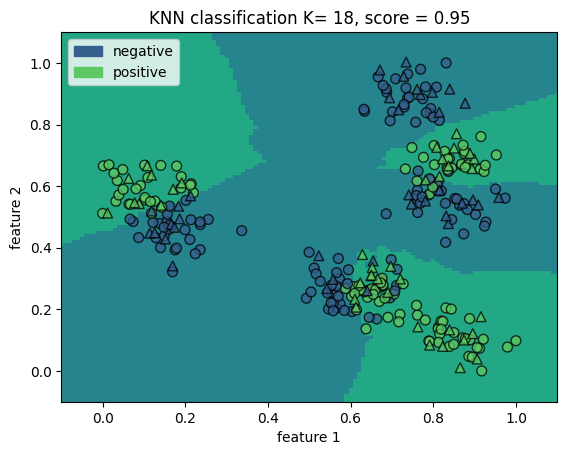

In [26]:
knn = KNeighborsClassifier(n_neighbors = k_best)
knn.fit(X_train_scaled, y_train)
score = knn.score(X_test_scaled, y_test)
plot_decision_boundary(knn, X_train_scaled, y_train, X_test=X_test_scaled, y_test= y_test,
                               title='KNN classification K= {}, score = {:.2f}'.format(k_best, score), 
                               precision=0.01,plot_symbol_size = 50)